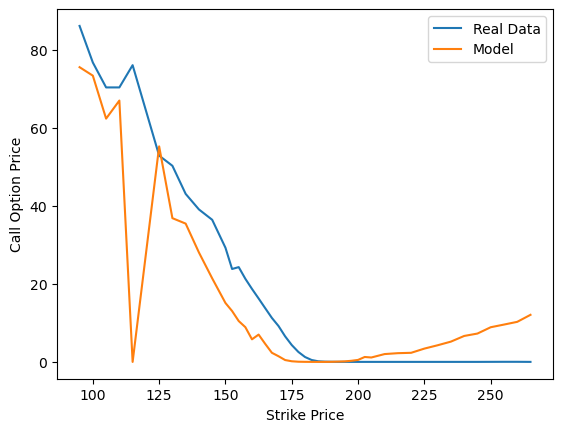

In [29]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import math

# Define the ticker symbol
tickerSymbol = 'AAPL'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the options data for calls
options_data = tickerData.option_chain()
implied_volatilities = options_data.calls['impliedVolatility'].values
strike_prices = options_data.calls['strike'].values
last_prices = options_data.calls['lastPrice'].values

# Define the parameters
S = 100  # underlying price
T = 1    # time to expiration in years
r = 0.0  # risk-free interest rate
q = 0    # dividend yield

def black_scholes_call_price(S, K, T, r, q, sigma):
    d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    call_price = S * math.exp(-q * T) * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    return call_price

# Calculate model option prices using Black-Scholes and the real implied volatilities
model_option_prices = np.zeros_like(strike_prices)
for i, vol in enumerate(implied_volatilities):
    model_option_prices[i] = black_scholes_call_price(S, strike_prices[i], T, r, q, implied_volatilities[i])

# Plotting
plt.plot(strike_prices, last_prices, label='Real Data')
plt.plot(strike_prices, model_option_prices, label='Model')
plt.xlabel('Strike Price')
plt.ylabel('Call Option Price')
plt.legend()
plt.show()


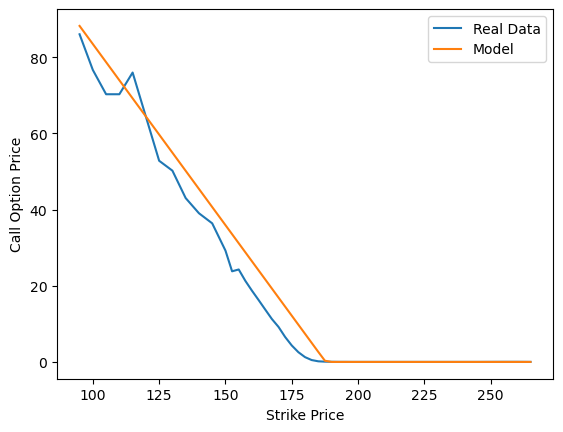

In [21]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import math

# Define the ticker symbol
tickerSymbol = 'AAPL'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the options data for calls
options_data = tickerData.option_chain()
implied_volatilities = options_data.calls['impliedVolatility'].values / 100.0  # Change: Convert to decimal
strike_prices = options_data.calls['strike'].values
last_prices = options_data.calls['lastPrice'].values

# Get the current underlying price
current_price = tickerData.history(period="1d")['Close'].iloc[0]

# Define the parameters
S = current_price  # current underlying price
T = 1              # time to expiration in years
r = 0.05           # risk-free interest rate (you can adjust this)
q = 0              # dividend yield (adjust if needed)

def black_scholes_call_price(S, K, T, r, q, sigma):
    d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)  # Change: Corrected calculation
    call_price = S * math.exp(-q * T) * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    return call_price

# Calculate model option prices using Black-Scholes and the real implied volatilities
model_option_prices = np.zeros_like(strike_prices)
for i, vol in enumerate(implied_volatilities):
    model_option_prices[i] = black_scholes_call_price(S, strike_prices[i], T, r, q, implied_volatilities[i])

# Plotting
plt.plot(strike_prices, last_prices, label='Real Data')
plt.plot(strike_prices, model_option_prices, label='Model')
plt.xlabel('Strike Price')
plt.ylabel('Call Option Price')
plt.legend()
plt.show()


178.61000061035156
[ 95.  100.  105.  110.  115.  125.  130.  135.  140.  145.  150.  152.5
 155.  157.5 160.  162.5 165.  167.5 170.  172.5 175.  177.5 180.  182.5
 185.  187.5 190.  192.5 195.  197.5 200.  202.5 205.  207.5 210.  215.
 220.  225.  230.  235.  240.  245.  250.  255.  260.  265. ]
[2.29297302e-02 2.22070757e-02 1.80078225e-02 2.00781748e-02
 1.00000000e-07 1.67480631e-02 1.16797291e-02 1.15820733e-02
 9.93164131e-03 8.51563984e-03 7.15823154e-03 6.73831387e-03
 6.16214775e-03 5.83011982e-03 5.00005000e-03 5.46879531e-03
 4.79009116e-03 3.98443516e-03 3.60846235e-03 2.94440649e-03
 2.55378540e-03 2.25837820e-03 2.09968838e-03 1.97273652e-03
 1.93855718e-03 2.09968838e-03 2.34382656e-03 2.65632344e-03
 2.89069609e-03 3.24225508e-03 3.59381406e-03 4.29693203e-03
 4.25786992e-03 4.60942891e-03 4.92192578e-03 5.15629844e-03
 5.31254688e-03 5.93754063e-03 6.40628594e-03 6.87503125e-03
 7.50002500e-03 7.81252188e-03 8.43751562e-03 8.75001250e-03
 9.06250937e-03 9.68750313e-03

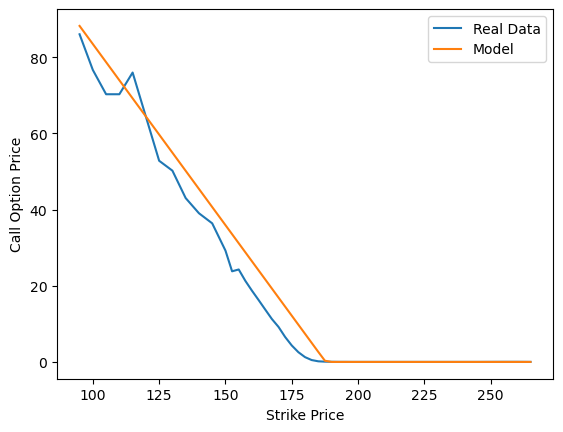

In [23]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import math

# Define the ticker symbol
tickerSymbol = 'AAPL'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the options data for calls
options_data = tickerData.option_chain()
implied_volatilities = options_data.calls['impliedVolatility'].values / 100.0  # Change: Convert to decimal
strike_prices = options_data.calls['strike'].values
last_prices = options_data.calls['lastPrice'].values

# Get the current underlying price
current_price = tickerData.history(period="1d")['Close'].iloc[0]

# Define the parameters
S = current_price  # current underlying price
T = 1              # time to expiration in years
r = 0.05           # risk-free interest rate (you can adjust this)
q = 0              # dividend yield (adjust if needed)

def black_scholes_call_price(S, K, T, r, q, sigma):
    d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)  # Change: Corrected calculation
    call_price = S * math.exp(-q * T) * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    return call_price

# Calculate model option prices using Black-Scholes and the real implied volatilities
model_option_prices = np.zeros_like(strike_prices)
for i, vol in enumerate(implied_volatilities):
    model_option_prices[i] = black_scholes_call_price(S, strike_prices[i], T, r, q, implied_volatilities[i])

print(S)
print(strike_prices)
print(implied_volatilities)

# Plotting
plt.plot(strike_prices, last_prices, label='Real Data')
plt.plot(strike_prices, model_option_prices, label='Model')
plt.xlabel('Strike Price')
plt.ylabel('Call Option Price')
plt.legend()
plt.show()


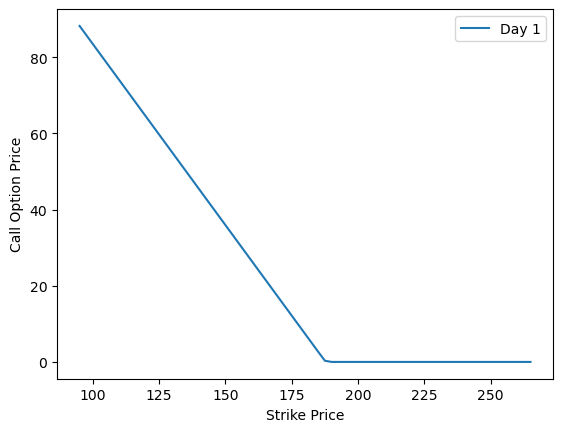

In [24]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import math

# Define the ticker symbol
tickerSymbol = 'AAPL'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the options data for calls
options_data = tickerData.option_chain()
implied_volatilities = options_data.calls['impliedVolatility'].values / 100.0  # Change: Convert to decimal
strike_prices = options_data.calls['strike'].values
last_prices = options_data.calls['lastPrice'].values

# Define the parameters
T = 1              # time to expiration in years
r = 0.05           # risk-free interest rate (you can adjust this)
q = 0              # dividend yield (adjust if needed)

# Initialize arrays to store underlying prices and model option prices for each day
days = np.arange(1, T + 1)
underlying_prices = np.zeros((len(days), len(strike_prices)))
model_option_prices = np.zeros((len(days), len(strike_prices)))

# Loop through each day within the expiration time
for t in days:
    # Get the current underlying price for this day
    S = tickerData.history(period=f"{t}d")['Close'].iloc[0]  # Change: Vary the historical data period
    underlying_prices[t - 1] = S
    
    # Calculate model option prices using Black-Scholes and the real implied volatilities
    for i, vol in enumerate(implied_volatilities):
        model_option_prices[t - 1, i] = black_scholes_call_price(S, strike_prices[i], T - t + 1, r, q, vol)

# Plotting
for t in days:
    plt.plot(strike_prices, model_option_prices[t - 1], label=f'Day {t}')  # Plot for each day

plt.xlabel('Strike Price')
plt.ylabel('Call Option Price')
plt.legend()
plt.show()


AAPL: Data doesn't exist for startDate = 1693145844, endDate = 1693145844


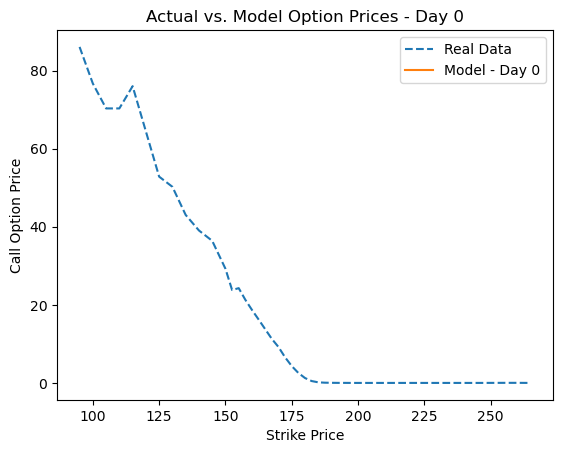

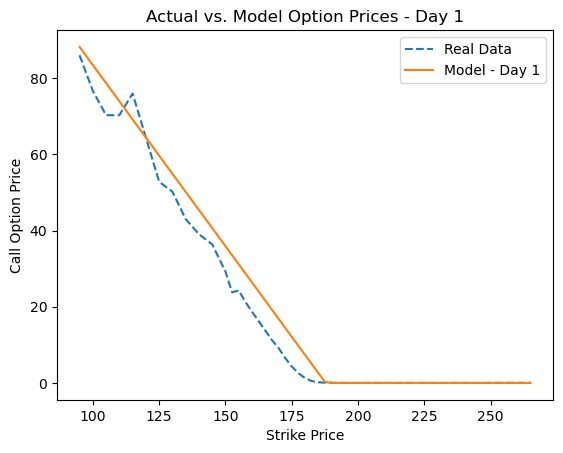

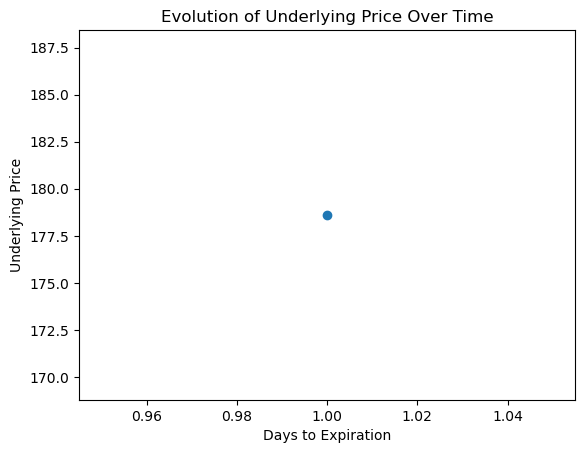

In [28]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import math
from datetime import datetime, timedelta

# Define the ticker symbol
tickerSymbol = 'AAPL'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the options data for calls
options_data = tickerData.option_chain()
implied_volatilities = options_data.calls['impliedVolatility'].values / 100.0
strike_prices = options_data.calls['strike'].values
last_prices = options_data.calls['lastPrice'].values

# Define the parameters
T = 1              # time to expiration in years
r = 0.05           # risk-free interest rate (you can adjust this)
q = 0              # dividend yield (adjust if needed)

def black_scholes_call_price(S, K, T, r, q, sigma):
    d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    call_price = S * math.exp(-q * T) * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    return call_price

# Initialize arrays to store prices and days
current_prices = []  # To store current prices for each day
days = np.arange(0, T + 1, 1)  # Array of days from 0 to T

# Get the start date for historical data
end_date = datetime.now()
start_dates = [end_date - timedelta(days=int(day)) for day in days]

# Iterate through each day and update the current price
for start_date in start_dates:
    try:
        current_price = tickerData.history(period="1d", interval="1d", start=start_date, end=end_date)['Close'].iloc[-1]
        current_prices.append(current_price)
    except IndexError:
        # Handle the case where data is not available for the specific date
        current_prices.append(None)  # Add a placeholder for missing data

# Calculate model option prices for each day using Black-Scholes and the real implied volatilities
model_option_prices = np.zeros((len(days), len(strike_prices)))
for i, current_price in enumerate(current_prices):
    if current_price is not None:
        for j, vol in enumerate(implied_volatilities):
            model_option_prices[i, j] = black_scholes_call_price(current_price, strike_prices[j], T - days[i] / 365, r, q, vol)
    else:
        model_option_prices[i, :] = None  # Set model prices to None for missing current prices

# Plotting
# Plot for actual prices vs. model prices for each day
for i in range(len(days)):
    if model_option_prices[i, 0] is not None:
        plt.plot(strike_prices, last_prices, label='Real Data', linestyle='dashed')
        plt.plot(strike_prices, model_option_prices[i], label=f'Model - Day {i}')
        plt.xlabel('Strike Price')
        plt.ylabel('Call Option Price')
        plt.legend()
        plt.title(f'Actual vs. Model Option Prices - Day {i}')
        plt.show()

# Plot for the evolution of underlying price over time
plt.plot(days, current_prices, marker='o')
plt.xlabel('Days to Expiration')
plt.ylabel('Underlying Price')
plt.title('Evolution of Underlying Price Over Time')
plt.show()
